In [1]:
###########################
# Setup
###########################
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Files
data = "../data/bigtable.csv"

pd.set_option('display.max_columns', None)

In [2]:
##### Set up dataframe
df = pd.read_csv(data)

# Orginal Shape
print(df.shape)
originalshape = df.shape[0]
print(f'Original Shape: {df.shape}')
print(f'Columns: {df.columns}')

(105398, 30)
Original Shape: (105398, 30)
Columns: Index(['datetime', 'pm25', 'type', 'sensor', 'station_id', 'x', 'y',
       'population', 'dist-mroads', 'dist-setl', 'dist-coast', 'dist-forest',
       'slope', 'elevation', 'dayofweek', 'sin_day', 'cos_day', 'sin_year',
       'cos_year', 'TEMP', 'DEW', 'SKY', 'VIS', 'ATM', 'Wind-Dir', 'Wind-Rate',
       'sin_wind', 'cos_wind', 'AQI_class', 'AQI_VALUE'],
      dtype='object')


In [3]:
# Remove NaN values
df = df.dropna(axis=0, how='any')
endshape = df.shape[0]

# Difference of NaN values
navalues = originalshape - endshape
print(f'Shape before removing NAs:{originalshape}')
print(f'# of NaN values removed: ({navalues})')
print(f'Shape after removing NAs:{endshape}')

Shape before removing NAs:105398
# of NaN values removed: (7724)
Shape after removing NAs:97674


In [4]:
# Modify Weather attributes
# Temperature
#df['Temperature'] = df['Temperature'].divide(other=10)

# Wind
#data = df['Wind'].str.split(pat=",", expand=True)
#df['Wind-Dir'] = data[0].astype('int64')
#df['Wind-Rate'] = data[3].astype('float64').divide(other=10)
#df.drop(columns=['Wind'], inplace=True)

# Dew
#df['Dew'] = df['Dew'].divide(other=10)

# Sky
#data = df['Sky'].str.split(pat=",", expand=True)
#df['Sky'] = data[0]
#df['Sky'] = data[0].astype('int64')

# Visibility
#data = df['Visibility'].str.split(pat=",", expand=True)
#df['Visibility'] = data[0]
#df['Visibility'] = data[0].astype('int64')

# ATM
#df['ATM'] = df['ATM'].divide(other=10)

df.drop(["Wind-Rate"], axis = 1)

,datetime,pm25,type,sensor,station_id,x,y,population,dist-mroads,dist-setl,dist-coast,dist-forest,slope,elevation,dayofweek,sin_day,cos_day,sin_year,cos_year,TEMP,DEW,SKY,VIS,ATM,Wind-Dir,sin_wind,cos_wind,AQI_class,AQI_VALUE
0,2019-05-08 15:00:00+00:00,52.33,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.049690,0.072,-1.541,2.792000,1.596,1.0,29.0,2,-0.707107,-7.071068e-01,0.806480,-0.591261,21.11,16.11,99999.0,16000.0,1021.81,50.0,0.766044,6.427876e-01,USG,123.860000
1,2019-05-09 15:00:00+00:00,43.76,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.049690,0.072,-1.541,2.792000,1.596,1.0,29.0,3,-0.707107,-7.071068e-01,0.796183,-0.605056,20.01,16.71,99999.0,16000.0,1021.31,90.0,1.000000,6.123234e-17,USG,106.720000
2,2019-05-16 16:00:00+00:00,11.41,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.049690,0.072,-1.541,2.792000,1.596,1.0,29.0,3,-0.866025,-5.000000e-01,0.717677,-0.696376,24.45,10.65,22000.0,16093.0,1013.15,330.0,-0.500000,8.660254e-01,Good,37.045455
3,2019-05-16 17:00:00+00:00,10.24,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.049690,0.072,-1.541,2.792000,1.596,1.0,29.0,3,-0.965926,-2.588190e-01,0.717677,-0.696376,25.05,10.65,22000.0,16093.0,1012.65,320.0,-0.642788,7.660444e-01,Good,33.246753
4,2019-05-16 18:00:00+00:00,9.45,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.049690,0.072,-1.541,2.792000,1.596,1.0,29.0,3,-1.000000,-1.836970e-16,0.717677,-0.696376,25.01,10.61,22000.0,16000.0,1012.61,320.0,-0.642788,7.660444e-01,Good,30.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105393,2019-10-27 18:00:00+00:00,2.00,AirNow,ND,DC_EPA,38.894750,-76.95343,3.510231,0.093,-0.216,3.958000,0.289,1.0,5.0,6,-1.000000,-1.836970e-16,-0.899631,0.436651,25.61,20.01,22000.0,16000.0,1008.01,310.0,-0.766044,6.427876e-01,Good,6.493506
105394,2019-10-27 18:00:00+00:00,5.00,AirNow,ND,MA_EPA,39.114400,-77.10690,0.094436,0.378,0.405,22.695999,-0.278,0.0,52.0,6,-1.000000,-1.836970e-16,-0.899631,0.436651,25.61,20.01,22000.0,16000.0,1008.01,310.0,-0.766044,6.427876e-01,Good,16.233766
105395,2019-10-27 18:00:00+00:00,2.00,AirNow,ND,MA_EPA,39.055300,-76.87830,0.094436,0.378,0.405,22.695999,-0.278,0.0,52.0,6,-1.000000,-1.836970e-16,-0.899631,0.436651,25.61,20.01,22000.0,16000.0,1008.01,310.0,-0.766044,6.427876e-01,Good,6.493506
105396,2019-10-27 18:00:00+00:00,7.00,AirNow,ND,DC_EPA,38.875160,-77.01282,3.510231,0.093,-0.216,3.958000,0.289,1.0,5.0,6,-1.000000,-1.836970e-16,-0.899631,0.436651,25.61,20.01,22000.0,16000.0,1008.01,310.0,-0.766044,6.427876e-01,Good,22.727273


In [5]:
df.head()

,datetime,pm25,type,sensor,station_id,x,y,population,dist-mroads,dist-setl,dist-coast,dist-forest,slope,elevation,dayofweek,sin_day,cos_day,sin_year,cos_year,TEMP,DEW,SKY,VIS,ATM,Wind-Dir,Wind-Rate,sin_wind,cos_wind,AQI_class,AQI_VALUE
0,2019-05-08 15:00:00+00:00,52.33,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,2,-0.707107,-7.071068e-01,0.806480,-0.591261,21.11,16.11,99999.0,16000.0,1021.81,50.0,3.6,0.766044,6.427876e-01,USG,123.860000
1,2019-05-09 15:00:00+00:00,43.76,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,3,-0.707107,-7.071068e-01,0.796183,-0.605056,20.01,16.71,99999.0,16000.0,1021.31,90.0,3.6,1.000000,6.123234e-17,USG,106.720000
2,2019-05-16 16:00:00+00:00,11.41,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,3,-0.866025,-5.000000e-01,0.717677,-0.696376,24.45,10.65,22000.0,16093.0,1013.15,330.0,3.6,-0.500000,8.660254e-01,Good,37.045455
3,2019-05-16 17:00:00+00:00,10.24,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,3,-0.965926,-2.588190e-01,0.717677,-0.696376,25.05,10.65,22000.0,16093.0,1012.65,320.0,5.7,-0.642788,7.660444e-01,Good,33.246753
4,2019-05-16 18:00:00+00:00,9.45,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,3,-1.000000,-1.836970e-16,0.717677,-0.696376,25.01,10.61,22000.0,16000.0,1012.61,320.0,5.7,-0.642788,7.660444e-01,Good,30.681818


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97674 entries, 0 to 105397
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     97674 non-null  object 
 1   pm25         97674 non-null  float64
 2   type         97674 non-null  object 
 3   sensor       97674 non-null  object 
 4   station_id   97674 non-null  object 
 5   x            97674 non-null  float64
 6   y            97674 non-null  float64
 7   population   97674 non-null  float64
 8   dist-mroads  97674 non-null  float64
 9   dist-setl    97674 non-null  float64
 10  dist-coast   97674 non-null  float64
 11  dist-forest  97674 non-null  float64
 12  slope        97674 non-null  float64
 13  elevation    97674 non-null  float64
 14  dayofweek    97674 non-null  int64  
 15  sin_day      97674 non-null  float64
 16  cos_day      97674 non-null  float64
 17  sin_year     97674 non-null  float64
 18  cos_year     97674 non-null  float64
 19  TEM

# Understanding the Data Set

In [7]:
df.describe()

,pm25,x,y,population,dist-mroads,dist-setl,dist-coast,dist-forest,slope,elevation,dayofweek,sin_day,cos_day,sin_year,cos_year,TEMP,DEW,SKY,VIS,ATM,Wind-Dir,Wind-Rate,sin_wind,cos_wind,AQI_VALUE
count,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,9.767400e+04,9.767400e+04,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,97674.000000,9.767400e+04,9.767400e+04,97674.000000
mean,11.190956,38.917444,-77.008027,24.894536,0.181510,-0.369947,6.194998,0.519940,1.534503,31.800837,2.992874,-1.100051e-02,1.275056e-02,-0.126217,-0.039860,16.791001,9.205592,33870.176884,15478.080912,1805.021227,216.558153,4.376273,-1.963345e-02,-3.994828e-02,33.766446
std,9.407907,0.076340,0.067598,46.141101,0.147225,0.541443,6.837276,0.638213,1.514806,18.101951,1.998769,7.055449e-01,7.084724e-01,0.706529,0.695203,9.812774,13.840747,39171.587303,12864.311659,2539.727739,170.261583,21.696886,5.929182e-01,8.040378e-01,22.787892
min,1.010000,38.771700,-77.108900,0.000000,0.000000,-1.541000,1.028000,-0.278000,0.000000,5.000000,0.000000,-1.000000e+00,-1.000000e+00,-0.999991,-0.999963,-12.250000,-25.650000,61.000000,400.000000,992.910000,10.000000,0.000000,-1.000000e+00,-1.000000e+00,3.279221
25%,5.000000,38.882974,-77.081078,0.094436,0.093000,-0.650000,2.121000,0.000000,0.000000,23.000000,1.000000,-7.071068e-01,-7.071068e-01,-0.811539,-0.732494,8.310000,1.120000,4267.000000,16000.000000,1013.650000,120.000000,2.600000,-5.000000e-01,-9.396926e-01,16.233766
50%,8.810000,38.913805,-77.013176,3.510231,0.118000,-0.216000,3.958000,0.289000,1.000000,32.000000,3.000000,-3.216245e-16,-1.608123e-16,-0.263665,-0.064508,18.350000,11.150000,22000.000000,16093.000000,1018.510000,190.000000,3.600000,-2.449294e-16,6.123234e-17,28.603896
75%,14.060000,38.921633,-76.958090,12.529437,0.378000,-0.093000,8.241000,1.250000,2.000000,48.000000,5.000000,7.071068e-01,7.071068e-01,0.566702,0.638749,24.450000,17.850000,99999.000000,16093.000000,1024.250000,300.000000,5.100000,5.000000e-01,7.660444e-01,45.649351
max,361.440000,39.114400,-76.878300,181.214554,0.464000,0.405000,22.695999,1.596000,5.000000,69.000000,6.000000,1.000000e+00,1.000000e+00,0.999991,1.000000,36.750000,999.990000,99999.000000,999999.000000,9999.990000,999.000000,999.900000,1.000000e+00,1.000000e+00,388.832000


## Looking at Center, Spread, Shape, and Outliers
Boxplots are a great way to communicate the center, spread, shape, and outliers of a distribution of univariate data. It's often the first visualization to reach for when looking at quantitative data.

In [8]:
# pm2.5
h1 = df.columns[1:1]
h2 = df.columns[5:14]
h3 = df.columns[15:22]
h4 = df.columns[23:27]

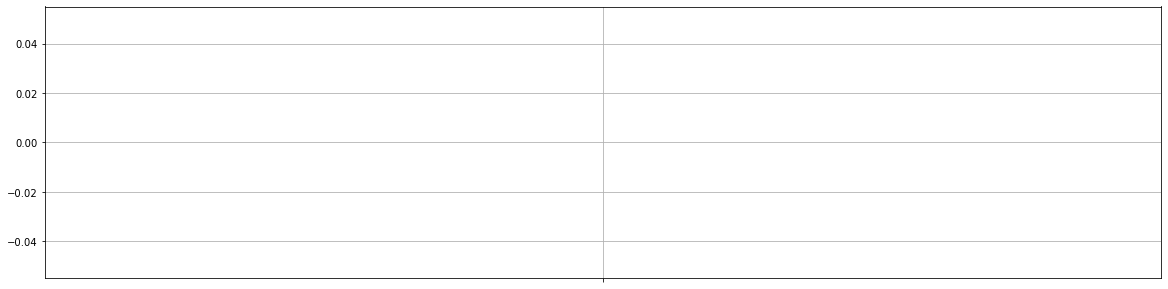

In [9]:
df[h1].boxplot(figsize=(20,5))

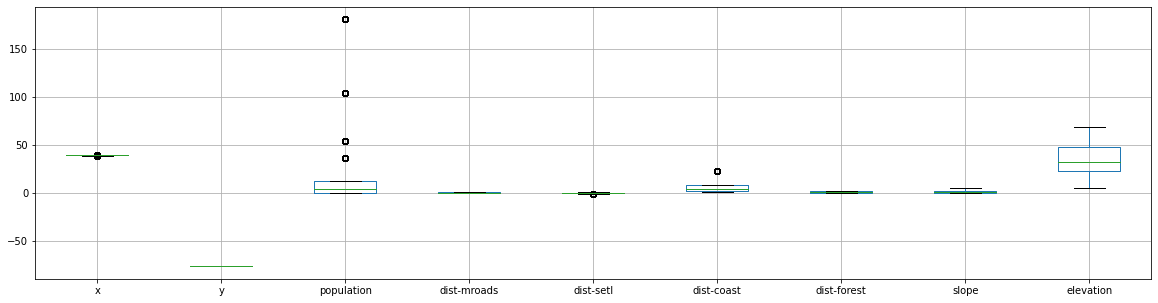

In [10]:
df[h2].boxplot(figsize=(20,5))

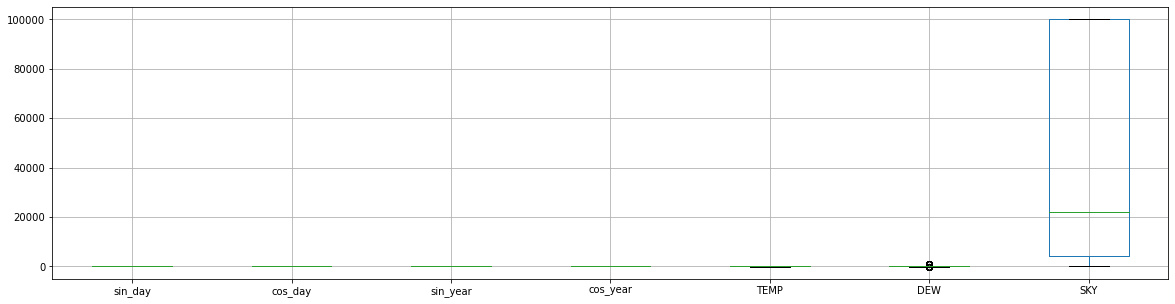

In [11]:
df[h3].boxplot(figsize=(20,5))

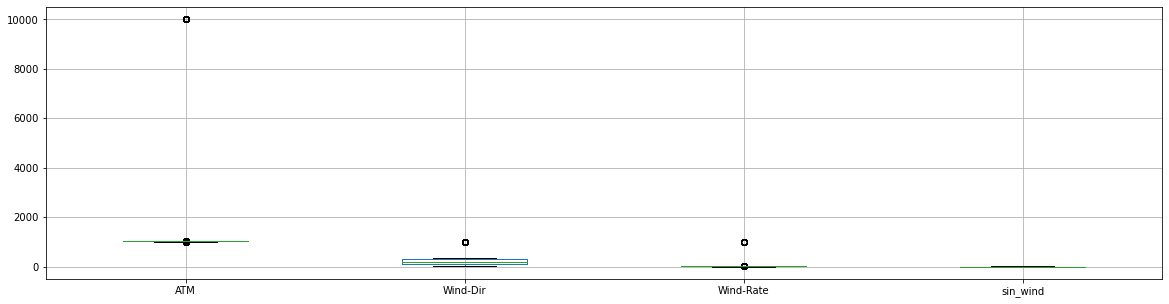

In [12]:
df[h4].boxplot(figsize=(20,5))

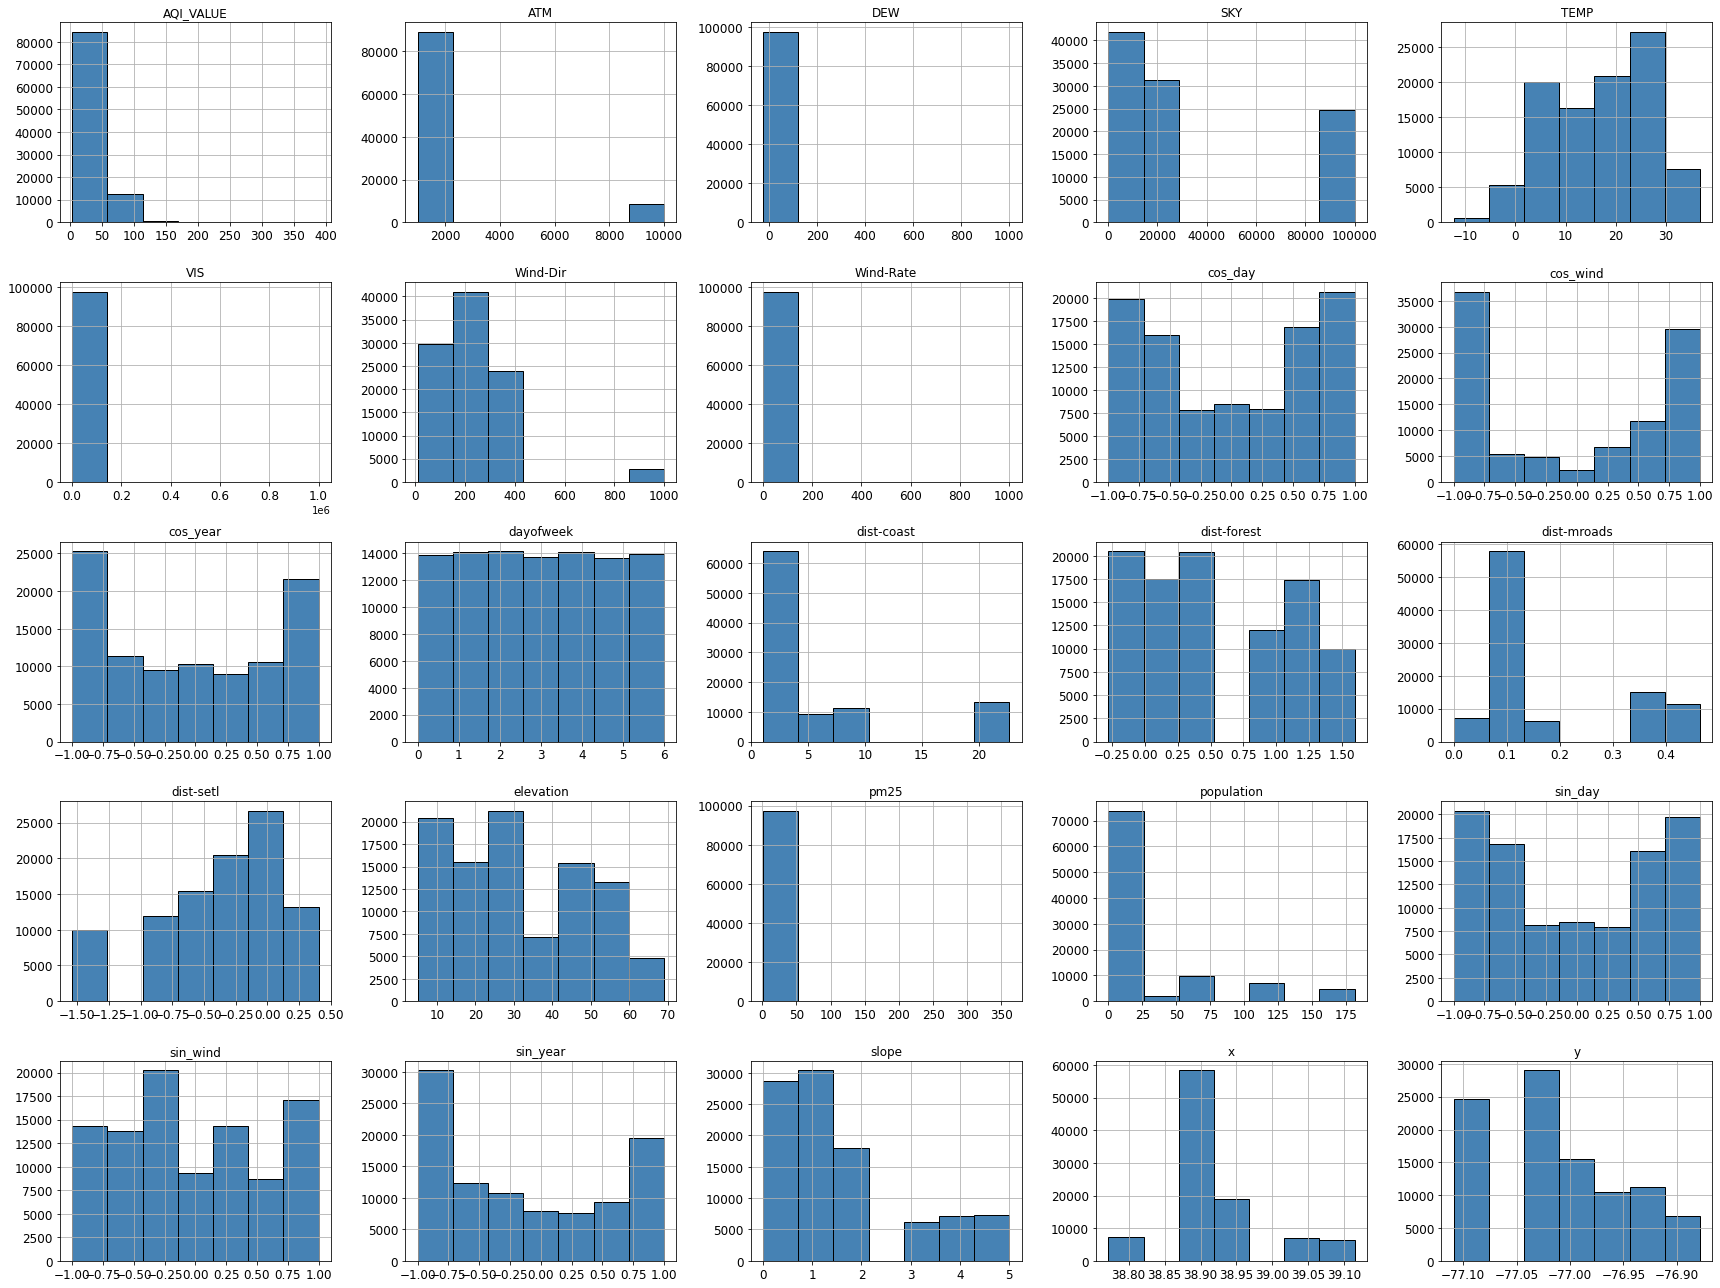

In [13]:
# Historgram of all attributes
df.hist(bins=7, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=12, ylabelsize=12, grid=True, figsize=(20,15))
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

# Cleaning the Dataset for Machine Learning

In [14]:
# Rename station_ids
#df = df.replace('13th and E St SE (outside) (38.882974 -76.988037) Primary 60_minute_average 01_01_2019 01_01_2020.csv', '13th and E St SE')
#df = df.replace('13th and E St SE B (undefined) (38.882974 -76.988037) Primary 60_minute_average 01_01_2019 01_01_2020.csv', '13th and E St SE B')
#df = df.replace('14th & S ST NW  (outside) (38.913805 -77.03275) Primary 60_minute_average 01_01_2019 01_01_2020.csv', '14')
#df = df.replace('14th & S ST NW  B (undefined) (38.913805 -77.03275) Primary 60_minute_average 01_01_2019 01_01_2020.csv', '14B')
#df = df.replace('arlington (outside) (38.900099 -77.081078) Primary 60_minute_average 01_01_2019 01_01_2020-1.csv', 'Arlington')
#df = df.replace('Cheverly (outside) (38.921633 -76.921768) Primary 60_minute_average 01_01_2019 01_01_2020-1.csv', 'Cheverly')
#df = df.replace('Cheverly (outside) (38.921633 -76.921768) Primary 60_minute_average 01_01_2019 01_01_2020-9.csv', 'Cheverly')
#df = df.replace('Courthouse  (outside) (38.88812 -77.088094) Primary 60_minute_average 01_01_2019 01_01_2020.csv', 'Courthouse')
#df = df.replace('McMillan 1 (outside) (38.92185 -77.013271) Primary 60_minute_average 01_01_2019 01_01_2020.csv', 'McMillan')
#df = df.replace('V Street (outside) (38.918491 -77.037393) Primary 60_minute_average 01_01_2019 01_01_2020.csv', 'VStreet')
#df = df.replace('[{name=US EPA AirNow, url=http://www.airnow.gov/}, {name=District of Columbia - Department of Energy and Environment, url=null}]', 'EPA DC')
#df = df.replace('[{name=US EPA AirNow, url=http://www.airnow.gov/}, {name=Maryland Department of the Environment, url=null}]', 'EPA Maryland')
#df = df.replace('[{name=US EPA AirNow, url=http://www.airnow.gov/}, {name=Virginia Dept. of Environmental Quality, url=null}]', 'EPA VA')

df["station_id"].value_counts()

DC_EPA              20416
MA_EPA              13232
13th & E ST SE A     7780
13th & E ST SE B     7684
VA_EPA               7257
V Street             7160
Arlington            6193
Cheverly 9           5631
Cheverly 1           5631
14th & S ST NW B     4974
14th & S ST NW A     4969
Courthouse           4809
McMillan 1           1938
Name: station_id, dtype: int64

In [15]:
#TEMP

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

pm25               9.060000
x                  0.038659
y                  0.122988
population        12.435001
dist-mroads        0.285000
dist-setl          0.557000
dist-coast         6.120000
dist-forest        1.250000
slope              2.000000
elevation         25.000000
dayofweek          4.000000
sin_day            1.414214
cos_day            1.414214
sin_year           1.378241
cos_year           1.371243
TEMP              16.140000
DEW               16.730000
SKY            95732.000000
VIS               93.000000
ATM               10.600000
Wind-Dir         180.000000
Wind-Rate          2.500000
sin_wind           1.000000
cos_wind           1.705737
AQI_VALUE         29.415584
dtype: float64


In [16]:
#print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
weather_columns = ["TEMP", "SKY", "DEW", "ATM", "VIS", "Wind-Rate"]

IQR_WEATHER = IQR[weather_columns]
Q1_WEATHER = Q1[weather_columns]
Q3_WEATHER = Q3[weather_columns]

for weather_column in weather_columns:
    print("Outliers for {} are < {} and > {}".format(weather_column, (Q1[weather_column] - 2 * IQR[weather_column]), (Q3[weather_column] + 2 * IQR[weather_column])))

for weather_column in weather_columns:
    print('(df["{}"] >= {:.4f}) & '.format(weather_column, (Q1[weather_column] - 2 * IQR[weather_column])))
    print('(df["{}"] <= {:.4f}) & '.format(weather_column, (Q3[weather_column] + 2 * IQR[weather_column])))


Outliers for TEMP are < -23.970000000000002 and > 56.730000000000004
Outliers for SKY are < -187197.0 and > 291463.0
Outliers for DEW are < -32.34 and > 51.31
Outliers for ATM are < 992.4499999999999 and > 1045.45
Outliers for VIS are < 15814.0 and > 16279.0
Outliers for Wind-Rate are < -2.399999999999999 and > 10.099999999999998
(df["TEMP"] >= -23.9700) & 
(df["TEMP"] <= 56.7300) & 
(df["SKY"] >= -187197.0000) & 
(df["SKY"] <= 291463.0000) & 
(df["DEW"] >= -32.3400) & 
(df["DEW"] <= 51.3100) & 
(df["ATM"] >= 992.4500) & 
(df["ATM"] <= 1045.4500) & 
(df["VIS"] >= 15814.0000) & 
(df["VIS"] <= 16279.0000) & 
(df["Wind-Rate"] >= -2.4000) & 
(df["Wind-Rate"] <= 10.1000) & 


## Removed weather and pm25 outliers

In [17]:
#dfinal = df.sort_values(by='pm25', ascending=False)
dfinal = df.loc[
        (df["TEMP"] >= -25.3500) & 
        (df["TEMP"] <= 57.6500) & 
        (df["SKY"] >= -31199.0000) & 
        (df["SKY"] <= 57466.0000) & 
        (df["DEW"] >= -32.3700) & 
        (df["DEW"] <= 51.3300) & 
        (df["ATM"] >= 992.5500) & 
        (df["ATM"] <= 1045.5500) & 
        (df["VIS"] >= 15814.0000) & 
        (df["VIS"] <= 16279.0000) & 
        (df["Wind-Rate"] >= -2.9000) & 
        (df["Wind-Rate"] <= 9.6000) &  
       #Because of EDA range:
       (df["pm25"] <= 500)
       #because direction in degrees:
       #& (df["Wind-Dir"] <= 360) 
      ]

start = df.shape[0]
final = dfinal.shape[0]

# # Difference of NaN values
removed = start - final
print(f'Shape before removing outliers:{start}')
print(f'# of outliers values removed:{removed}')
print(f'Shape after removings:{final}')

Shape before removing outliers:97674
# of outliers values removed:36535
Shape after removings:61139


In [18]:
dfinal.to_csv('eda.csv', index=False)

# EDA

In [19]:
data = "../model/eda.csv"

df = pd.read_csv(data)

In [20]:
df.shape

(61139, 30)

In [21]:
df.columns

Index(['datetime', 'pm25', 'type', 'sensor', 'station_id', 'x', 'y',
       'population', 'dist-mroads', 'dist-setl', 'dist-coast', 'dist-forest',
       'slope', 'elevation', 'dayofweek', 'sin_day', 'cos_day', 'sin_year',
       'cos_year', 'TEMP', 'DEW', 'SKY', 'VIS', 'ATM', 'Wind-Dir', 'Wind-Rate',
       'sin_wind', 'cos_wind', 'AQI_class', 'AQI_VALUE'],
      dtype='object')

In [22]:
df['station_id'].value_counts()

DC_EPA              12955
MA_EPA               8221
13th & E ST SE A     4830
13th & E ST SE B     4762
VA_EPA               4532
V Street             4445
Arlington            3918
Cheverly 9           3365
Cheverly 1           3365
14th & S ST NW B     3207
14th & S ST NW A     3205
Courthouse           3095
McMillan 1           1239
Name: station_id, dtype: int64

In [23]:
#eda = df[["pm25","x","y","Population","Dist-MRoads","Dist-Setl","Dist-Coast","Dist-Forest","Slope","Elevation","dayofweek","sin_day","cos_day","sin_year","cos_year","Temperature","Wind","Dew","Sky","Visibility","ATM"]]

## Univariate Analysis
Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension). Basic data distribution of all attributes. The plots above give a good idea about the basic data distribution of any of the attributes.
Let’s drill down to visualizing one of the continuous, numeric attributes. Essentially a histogram or a density plot works quite well in understanding how the data is distributed for that attribute.

In [24]:
df.head()

,datetime,pm25,type,sensor,station_id,x,y,population,dist-mroads,dist-setl,dist-coast,dist-forest,slope,elevation,dayofweek,sin_day,cos_day,sin_year,cos_year,TEMP,DEW,SKY,VIS,ATM,Wind-Dir,Wind-Rate,sin_wind,cos_wind,AQI_class,AQI_VALUE
0,2019-05-16 16:00:00+00:00,11.41,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,3,-0.866025,-5.000000e-01,0.717677,-0.696376,24.45,10.65,22000.0,16093.0,1013.15,330.0,3.6,-0.500000,0.866025,Good,37.045455
1,2019-05-16 17:00:00+00:00,10.24,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,3,-0.965926,-2.588190e-01,0.717677,-0.696376,25.05,10.65,22000.0,16093.0,1012.65,320.0,5.7,-0.642788,0.766044,Good,33.246753
2,2019-05-16 18:00:00+00:00,9.45,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,3,-1.000000,-1.836970e-16,0.717677,-0.696376,25.01,10.61,22000.0,16000.0,1012.61,320.0,5.7,-0.642788,0.766044,Good,30.681818
3,2019-05-16 19:00:00+00:00,7.73,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,3,-0.965926,2.588190e-01,0.717677,-0.696376,25.65,7.25,22000.0,16093.0,1011.55,340.0,4.6,-0.342020,0.939693,Good,25.097403
4,2019-05-16 21:00:00+00:00,6.36,PurpleAir,B,14th & S ST NW B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1.0,29.0,3,-0.707107,7.071068e-01,0.717677,-0.696376,25.61,6.11,22000.0,16000.0,1011.31,999.0,2.6,-0.342020,0.939693,Good,20.649351


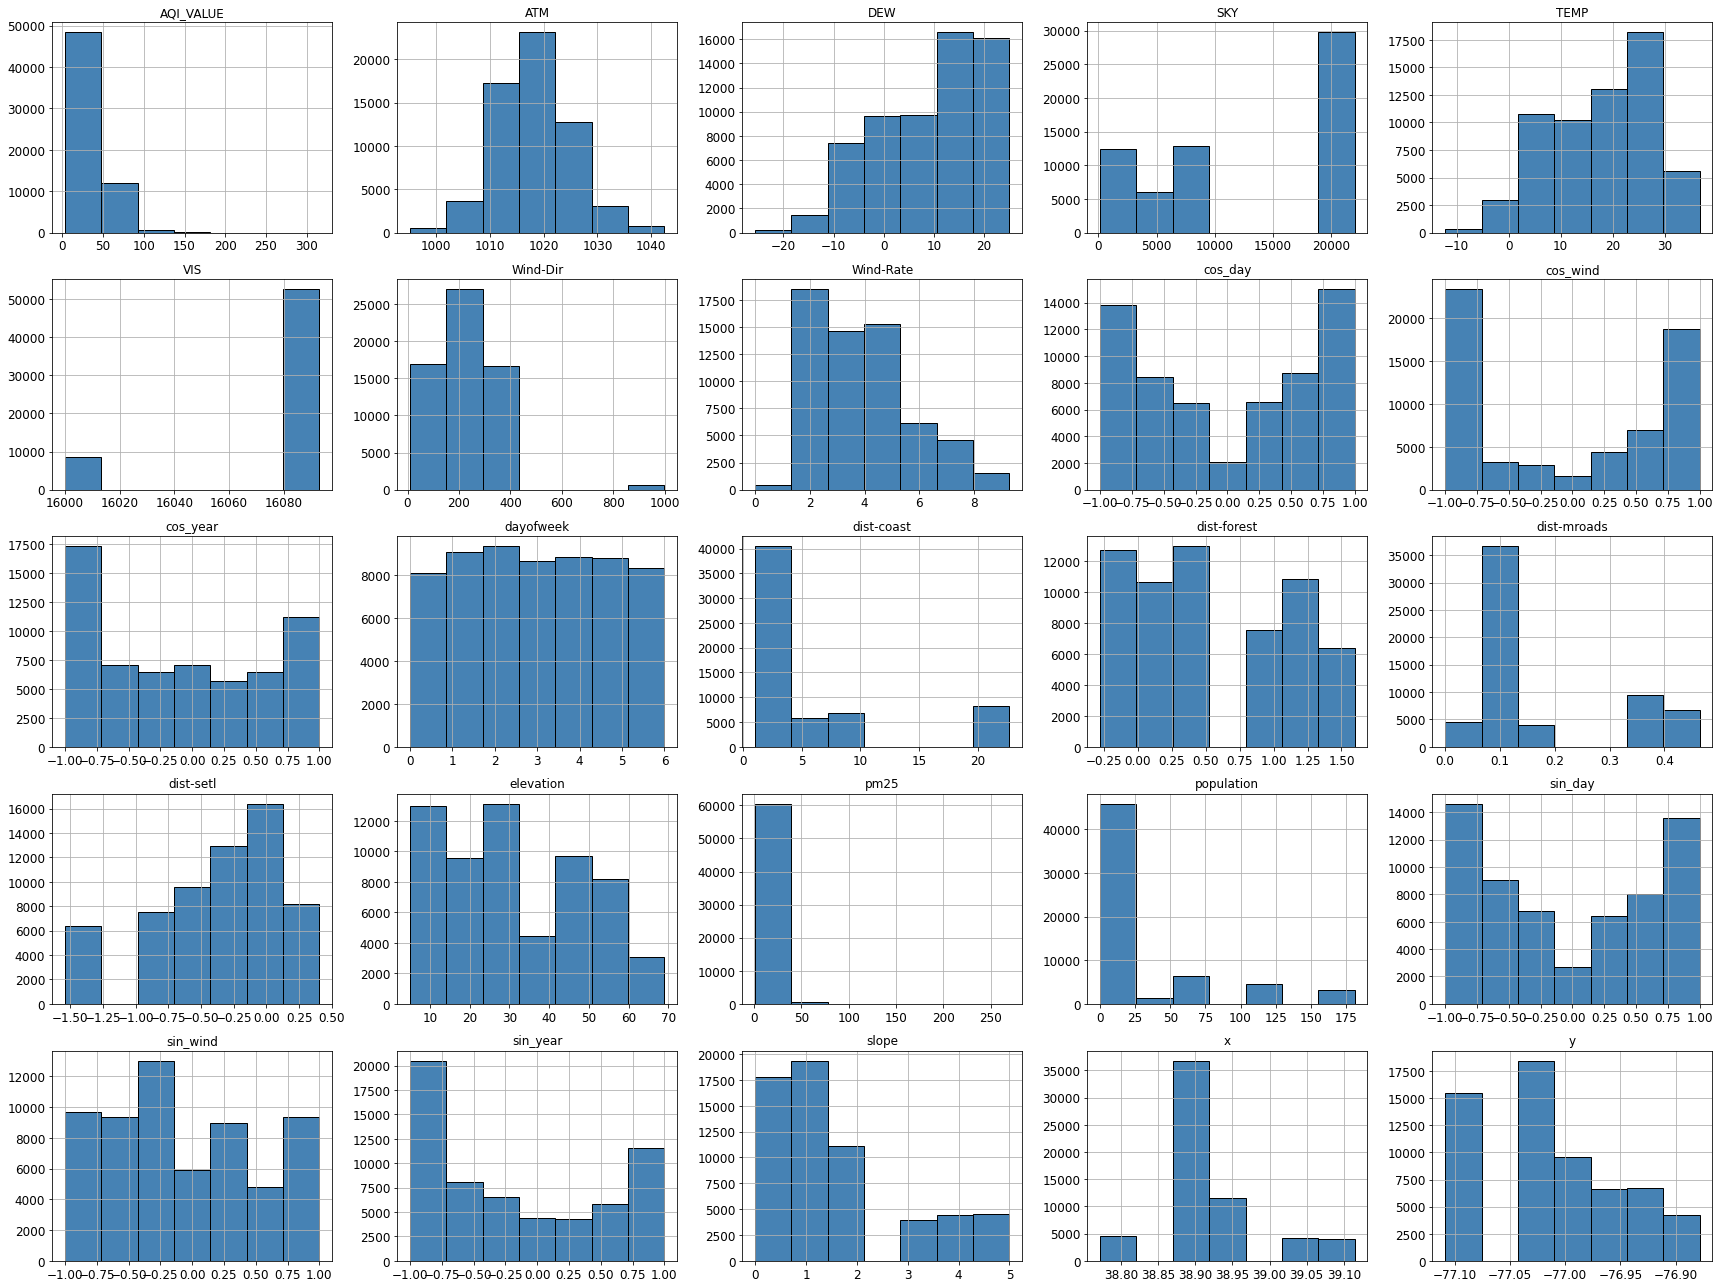

In [25]:
# Historgram of all attributes
df.hist(bins=7, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=12, ylabelsize=12, grid=True, figsize=(20,15))
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

## Multivariate Analysis
Multivariate analysis is where the fun as well as the complexity begins. Here we analyze multiple data dimensions or attributes (2 or more). Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes. You can also leverage inferential statistics and hypothesis testing if necessary based on the problem to be solved at hand to check out statistical significance for different attributes, groups and so on.
One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix and depict it as a heatmap.

The Pearson correlation coefficient, r, is a number between -1 and 1 that indicates the strength and direction of the linear relationship between two variables.

The gradients in the heatmap vary based on the strength of the correlation and you can clearly see it is very easy to spot potential attributes having strong correlations amongst themselves. Another way to visualize the same is to use pair-wise scatter plots amongst attributes of interest.

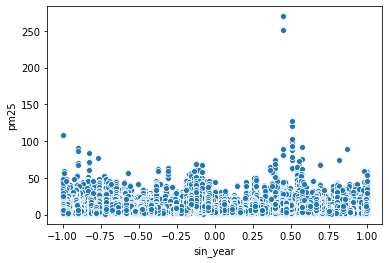

In [26]:
ax = sns.scatterplot(x="sin_year", y="pm25", data=df)

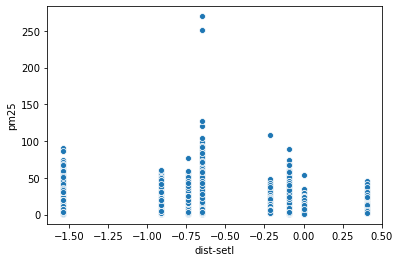

In [27]:
ax = sns.scatterplot(x="dist-setl", y="pm25", data=df)
#we see the 7 different substations

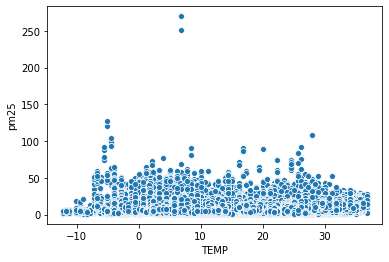

In [28]:
ax = sns.scatterplot(x="TEMP", y="pm25", data=df)

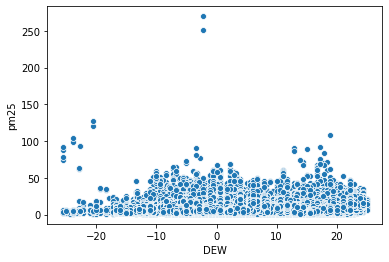

In [29]:
ax = sns.scatterplot(x="DEW", y="pm25", data=df)

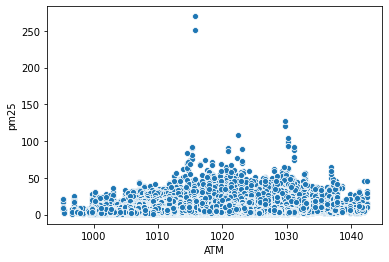

In [30]:
ax = sns.scatterplot(x="ATM", y="pm25", data=df)

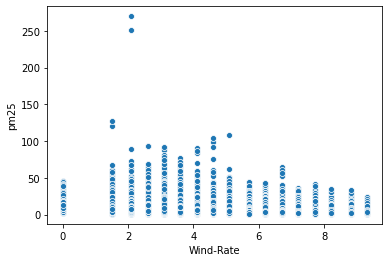

In [31]:
ax = sns.scatterplot(x="Wind-Rate", y="pm25", data=df)

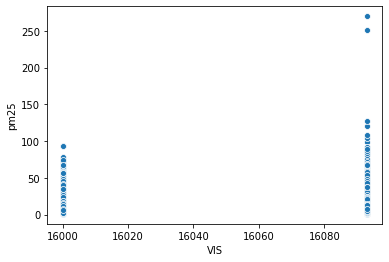

In [32]:
ax = sns.scatterplot(x="VIS", y="pm25", data=df)

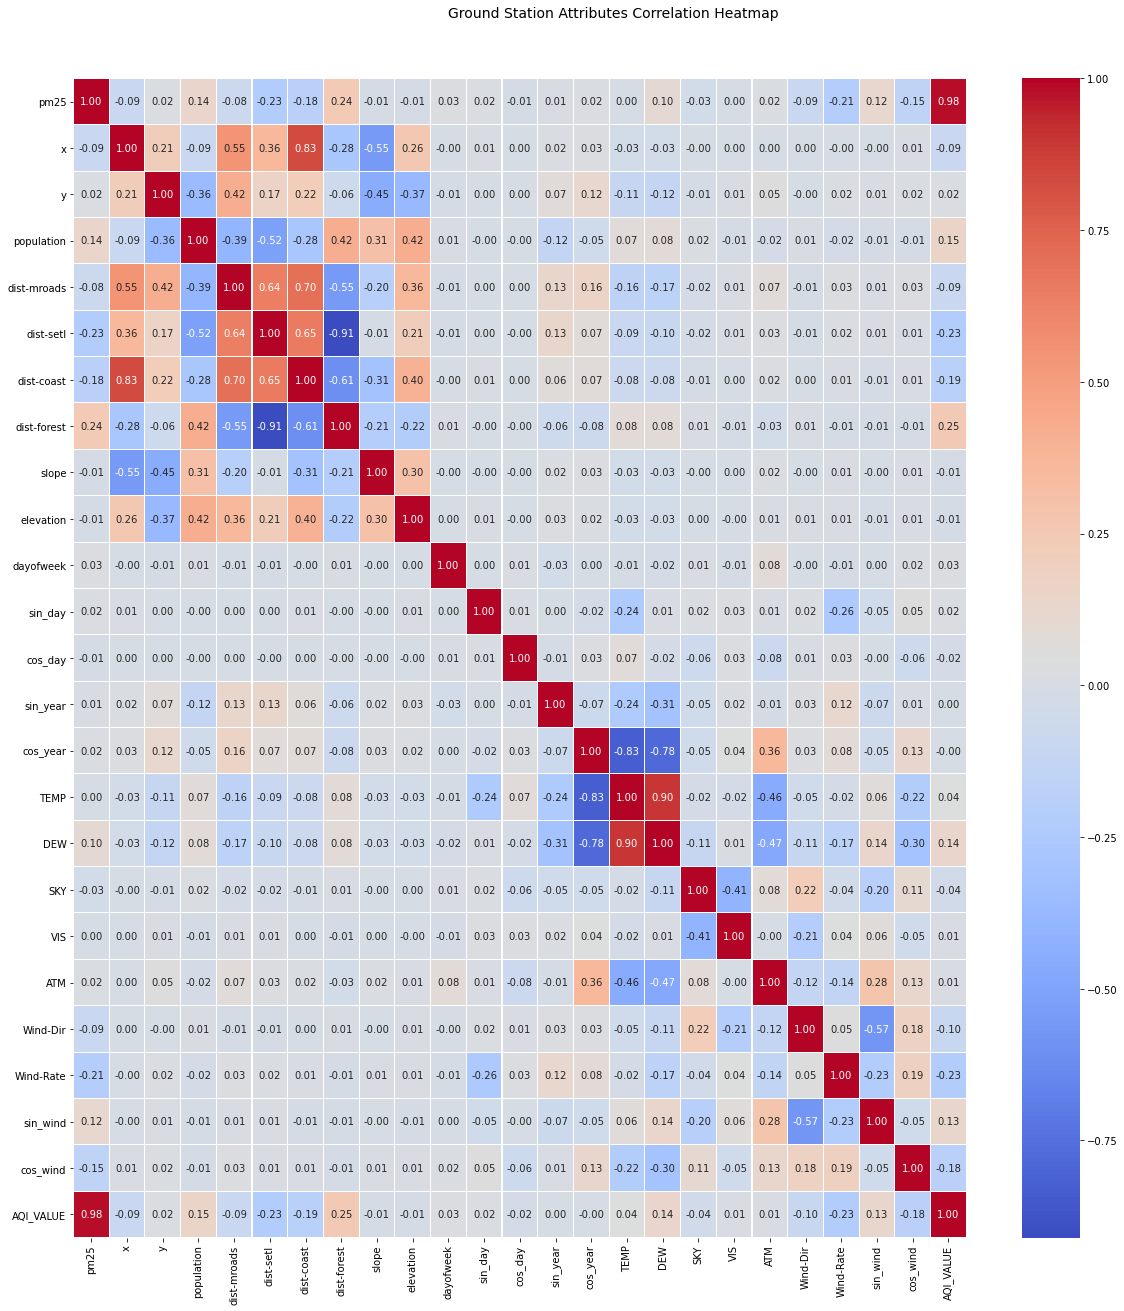

In [33]:
# Pearson Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Ground Station Attributes Correlation Heatmap', fontsize=14)

In [34]:
# Load
# dfinal.to_csv('final.csv', index=False)
